In [1]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm
from matplotlib import pyplot as plt

# Question 14

This problem focuses on the *collinearity* problem.

## Part A

Perform the following commands in `Python`:
```
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)
```

The last line corresponds to creating a linear model in which `y` is a function of `x1` and `x2`. Write out the form of the linear model. What are the regression coefficients?

In [4]:
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

The form of the linear model is: $Y=2 + 2 * \beta_1 + 0.3 * \beta_2$.

The regression coefficients are:
- $\beta_0=2$
- $\beta_1=2$
- $\beta_2=0.3$

## Part B

What is the correlation between `x1` and `x2`? Create a scatterplot displaying the relationship between the variables. 

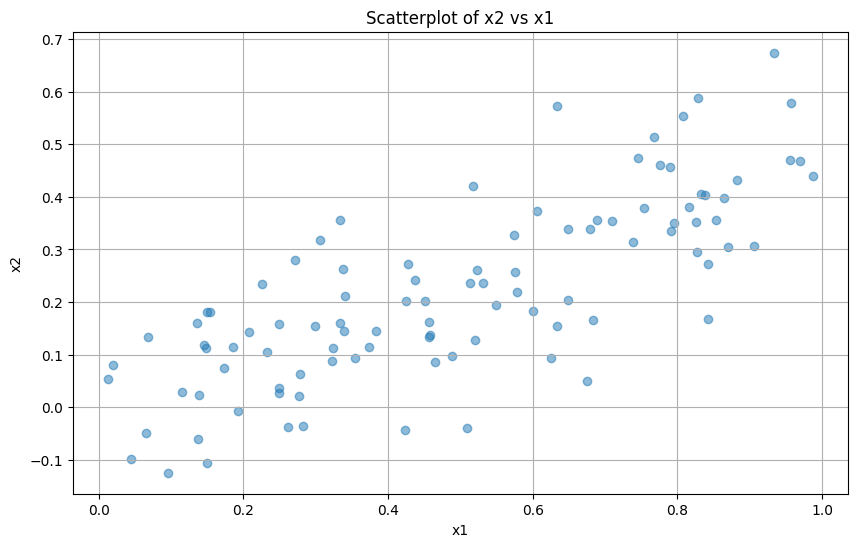

The correlation between x1 and x2 is 0.7723


In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(x1, x2, alpha=0.5)
plt.title("Scatterplot of x2 vs x1")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()

print(f"The correlation between x1 and x2 is {np.corrcoef(x1, x2)[0, 1]:.4f}")

## Part C

Using this data, fit a least squares regression to predict `y` using `x1` and `x2`. Describe the results obtained. What are the $\hat{\beta}_0$, $\hat{\beta}_1$, and $\hat{\beta}_2$? How do these relate to the true $\beta_0$, $\beta_1$, and $\beta_2$? Can you reject the null hypothesis $H_0:\beta_2=0$?

In [21]:
df = pd.DataFrame({
    'y': y,
    'x1': x1,
    'x2': x2
})

X = sm.add_constant(df[['x1', 'x2']])

model = sm.OLS(df['y'], X)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           5.76e-08
Time:                        22:50:43   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9579      0.190     10.319      0.000       1.581       2.334
x1             1.6154      0.527      3.065      0.003       0.569       2.661
x2             0.9428      0.831      1.134      0.259      -0.707       2.592
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.041
Skew:                          -0.036   Prob(JB):                        0.979
Kurtosis:                       2.931   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the $\text{f-statistic}$, we can see that there is a relationship between one or more of the predictors and the response. We can also see based on the $R^2$ value that only ~$29\%$ of the variance in the response is described by the model, showing that this model does not fully accurately capture the response data.

The estimated coefficients are as follows:
- $\hat{\beta}_0=1.9579$ vs $\beta_0=2$
- $\hat{\beta}_1=1.6154$ vs $\beta_1=2$
- $\hat{\beta}_2=0.9428$ vs $\beta_2=0.3$

You can reject the null hypothesis $H_0:\beta_1=0$ because the $\text{p-value}=0.003 < 0.05$ meaning the parameter is statistically significant. However, you cannot reject the null hypothesis $H_1:\beta_2=0$ because the $\text{p-value}=0.259 > 0.05$ meaning the parameter is not statistically significant. 

## Part D

Now fit a least squares regression to predict `y` using only `x1`. Comment on your results. Can you reject the null hypothesis $H_0: \beta_1=0$?

In [24]:
X = sm.add_constant(df[['x1']])
model = sm.OLS(df['y'], X)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           1.37e-08
Time:                        23:06:54   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9371      0.189     10.242      0.000       1.562       2.312
x1             2.0771      0.335      6.196      0.000       1.412       2.742
==============================================================================
Omnibus:                        0.204   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.903   Jarque-Bera (JB):                0.042
Skew:                          -0.046   Prob(JB):                        0.979
Kurtosis:                       3.038   Cond. No.                         4.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here we can see that the model still does not capture all the variance present in the response based on the $\text{R-squared}$ value of $0.281$ (meaning only $28.1\%$ of the variance in the response is captured by the model). Also, we can see the coefficient values of $\hat{\beta}_0$ and $\hat{\beta}_1$ are much closed to the expected values of $2$ for $\beta_0$ and $\beta_1$. We can reject the null hypothesis here as the $\text{p-value}$ for $\hat{\beta}_1$ is $0.000 < 0.05$.

## Part E

Now fit a least squares regression to predict `y` using only `x2`. Comment on your results. Can you reject the null hypothesis $H_0:\beta_1=0$?

In [25]:
X = sm.add_constant(df[['x2']])
model = sm.OLS(df['y'], X)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           7.43e-07
Time:                        23:15:03   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3239      0.154     15.124      0.000       2.019       2.629
x2             2.9103      0.550      5.291      0.000       1.819       4.002
==============================================================================
Omnibus:                        0.191   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.909   Jarque-Bera (JB):                0.373
Skew:                          -0.034   Prob(JB):                        0.830
Kurtosis:                       2.709   Cond. No.                         6.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The results here are interesting because the single linear regression for $Y$ onto $X$ shows that $x_2$ is statistically significant based on its $\text{p-value}$ of $0.000$, meaning that we can reject the null hypothesis.

## Part F

Do the results obtained in (c)-(e) contradict each other? Explain your answer.

Yes, the results obtained in part c shows that $x_2$ is not statistically significant, while $x_1$ is statistically significant. However, when we split apart the multiple linear regressions into the individual regressions, both parameters appear to be statistically significant. It is clear that due to the high correlation between $x_1$ and $x_2$, since $x_1$ is statistically significant when calculating the response $y$, $x_2$ also shows up as significant due to its collinearity. However, when we use multiple linear regression, we can see that the true relevant parameter is $x_1$. 